In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from classification_utils import *

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

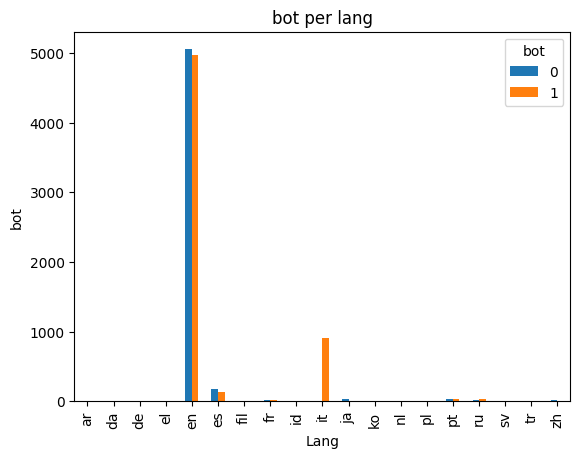

In [6]:
plot_lang_hist(data)

In [7]:
data = discretize_data(data, ["lang"])

In [8]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619,4


In [9]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [10]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
169157567,28817,75.439373,16.939511,0.162222,1.206489,0.182568,0.0,0.000000,0.518009,1.146664,1.345766,5.829805,36.145741,5
1174853904,19,94.857143,14.694444,0.142857,0.095238,0.333333,0.0,0.212959,0.000000,0.000000,0.000000,0.047619,0.212959,4
215777333,15262,57.606860,12.648417,0.044855,0.701187,0.087071,0.0,0.000000,0.085752,0.315447,0.431374,0.043478,74.474554,4
1174349246,16,62.263158,20.157895,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
2567242052,6758,50.712850,10.883727,0.018745,0.415920,0.027438,0.0,0.000000,0.400435,0.604196,1.151609,0.043478,61.635542,4


In [11]:
train_label.head()

169157567     0
1174853904    0
215777333     0
1174349246    0
2567242052    0
Name: bot, dtype: int64

### Usage of Lang

In [12]:
# To use GaussianNB we have to have gaussian distributed data, so apply standard scaler

scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [13]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_X)
test_pred_gnb = gnb.predict(test_X)

In [14]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8369956548727499
Accuracy test set  0.8598320301187373
Precision train set  0.8536088055871441
Recall train set  0.8369956548727499
F1 score train set  0.8335968044488082
Support train set  (array([0.93099825, 0.78538462]), array([0.70429253, 0.95398271]), array([0.80193091, 0.8615125 ]), array([3774, 4281]))


In [15]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.95      0.74      0.83      1618
         >50       0.81      0.97      0.88      1835

    accuracy                           0.86      3453
   macro avg       0.88      0.85      0.86      3453
weighted avg       0.88      0.86      0.86      3453



In [16]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0023005008697509766
Score time  0.0010123252868652344
Test score  0.8361266294227189
Train score  0.8365611421477344


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


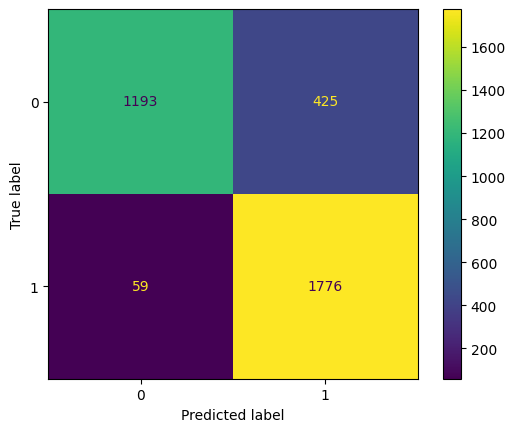

In [17]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_X, test_label)
plt.show() 

In [18]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

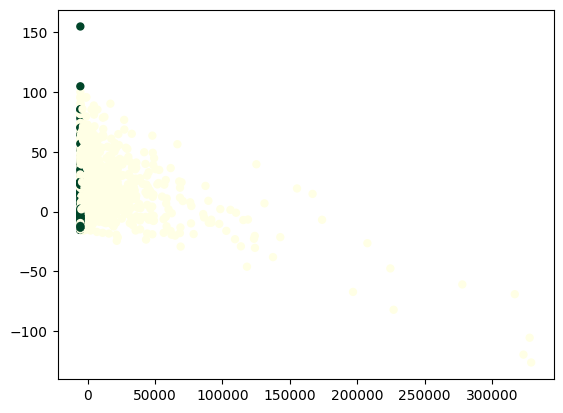

In [19]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

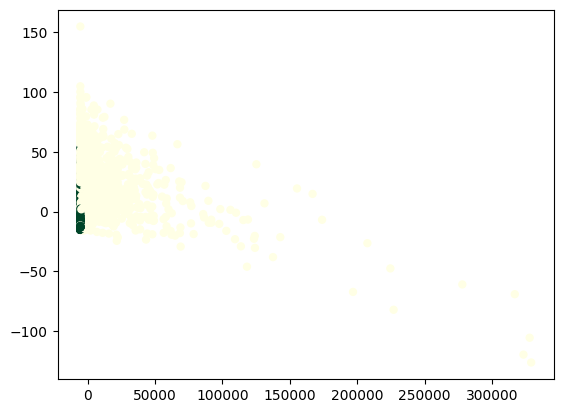

In [20]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');

### How lang is biased

In [21]:
# take a non bot user
non_bot_users = test_set[test_label==0]
total_bot = (test_label==0).sum()

In [22]:
test_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
1129036489,53,71.210526,17.473684,0.000000,0.000000,0.052632,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
2378868756,42,66.721649,15.051546,0.000000,0.247423,0.103093,0.0,0.0,0.061856,0.280443,0.330143,0.061856,0.240893,4
616224899,45,70.545455,20.072727,0.018182,0.018182,0.090909,0.0,0.0,0.054545,0.296536,0.261727,0.018182,0.133609,4
2469581288,15921,62.579753,13.993555,0.134533,0.586198,0.093985,0.0,0.0,0.469119,1.840837,1.080156,0.043478,72.173977,4
140288349,31737,73.543562,15.306849,0.100274,0.882740,0.061918,0.0,0.0,0.131507,0.407087,0.583400,12.004384,53.147342,4


In [23]:
non_bot_users_X = scaler.transform(non_bot_users.values)

In [24]:
gnb.predict(non_bot_users_X).sum()/total_bot

0.2626699629171817

In [25]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    modified_non_bot_users_X = scaler.transform(modified_non_bot_users.values)
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users_X).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.26019777503090236
number bot classified with lang_num = 9 : 0.26637824474660077
number bot classified with lang_num = 7 : 0.2626699629171817
number bot classified with lang_num = 15 : 0.2762669962917182
number bot classified with lang_num = 5 : 0.26019777503090236
number bot classified with lang_num = 17 : 0.27935723114956734
number bot classified with lang_num = 14 : 0.27441285537700866
number bot classified with lang_num = 12 : 0.273176761433869
number bot classified with lang_num = 8 : 0.26452410383189123
number bot classified with lang_num = 18 : 0.28244746600741655
number bot classified with lang_num = 10 : 0.26761433868974044
number bot classified with lang_num = 2 : 0.26019777503090236
number bot classified with lang_num = 11 : 0.27132262051915945
number bot classified with lang_num = 1 : 0.26019777503090236
number bot classified with lang_num = 0 : 0.2626699629171817
number bot classified with lang_num = 13 : 0.27441285537700866
numbe

### Removed Lang attribute for classification

In [26]:
del train_set["lang_num"]

In [27]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
169157567,28817,75.439373,16.939511,0.162222,1.206489,0.182568,0.0,0.000000,0.518009,1.146664,1.345766,5.829805,36.145741
1174853904,19,94.857143,14.694444,0.142857,0.095238,0.333333,0.0,0.212959,0.000000,0.000000,0.000000,0.047619,0.212959
215777333,15262,57.606860,12.648417,0.044855,0.701187,0.087071,0.0,0.000000,0.085752,0.315447,0.431374,0.043478,74.474554
1174349246,16,62.263158,20.157895,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2567242052,6758,50.712850,10.883727,0.018745,0.415920,0.027438,0.0,0.000000,0.400435,0.604196,1.151609,0.043478,61.635542


In [28]:
del test_set["lang_num"]

In [29]:
test_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
1129036489,53,71.210526,17.473684,0.000000,0.000000,0.052632,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2378868756,42,66.721649,15.051546,0.000000,0.247423,0.103093,0.0,0.0,0.061856,0.280443,0.330143,0.061856,0.240893
616224899,45,70.545455,20.072727,0.018182,0.018182,0.090909,0.0,0.0,0.054545,0.296536,0.261727,0.018182,0.133609
2469581288,15921,62.579753,13.993555,0.134533,0.586198,0.093985,0.0,0.0,0.469119,1.840837,1.080156,0.043478,72.173977
140288349,31737,73.543562,15.306849,0.100274,0.882740,0.061918,0.0,0.0,0.131507,0.407087,0.583400,12.004384,53.147342


In [30]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [31]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_X)
test_pred_gnb = gnb2.predict(test_X)

In [32]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8301675977653631
Accuracy test set  0.8549087749782798
Precision train set  0.8436282963085365
Recall train set  0.8301675977653631
F1 score train set  0.8270602328042216
Support train set  (array([0.91142271, 0.78386279]), array([0.70614732, 0.93950012]), array([0.79575993, 0.85465363]), array([3774, 4281]))


In [33]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.94      0.74      0.83      1618
         >50       0.81      0.96      0.88      1835

    accuracy                           0.85      3453
   macro avg       0.87      0.85      0.85      3453
weighted avg       0.87      0.85      0.85      3453



In [34]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.002080678939819336
Score time  0.0010416507720947266
Test score  0.8305400372439479
Train score  0.8298572315332092


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


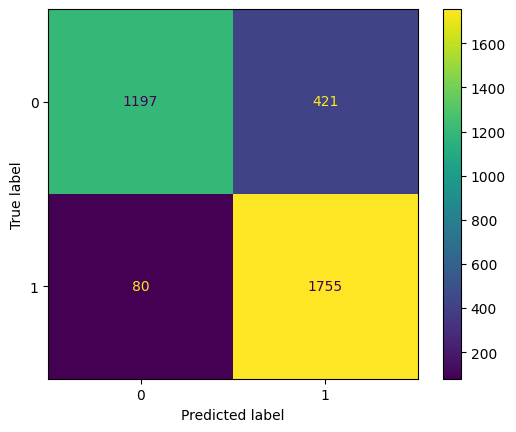

In [35]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_X, test_label)
plt.show() 

In [36]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

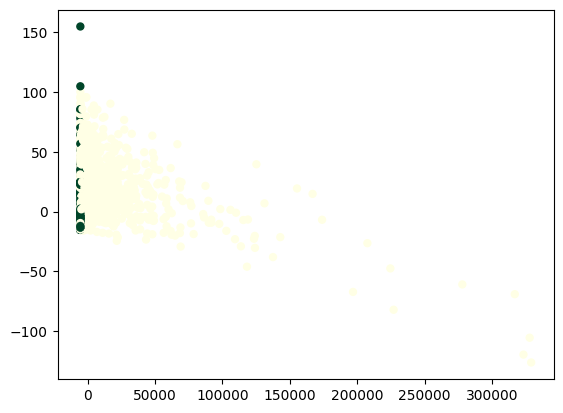

In [37]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

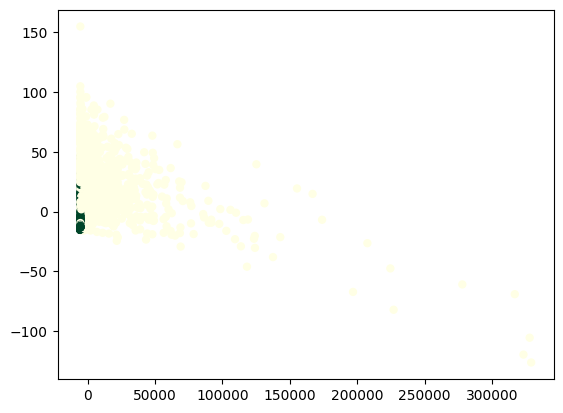

In [38]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');